In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [4]:
data = pd.read_csv('diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Underweight:0 diabetes cases out of 4 total recorded data
Normal:7 diabetes cases out of 108 total recorded data
Overweight:44 diabetes cases out of 180 total recorded data
Obese Class 1:100 diabetes cases out of 221 total recorded data
Obese Class 2:61 diabetes cases out of 148 total recorded data
Obese 3:54 diabetes cases out of 96 total recorded data


<function matplotlib.pyplot.show(close=None, block=None)>

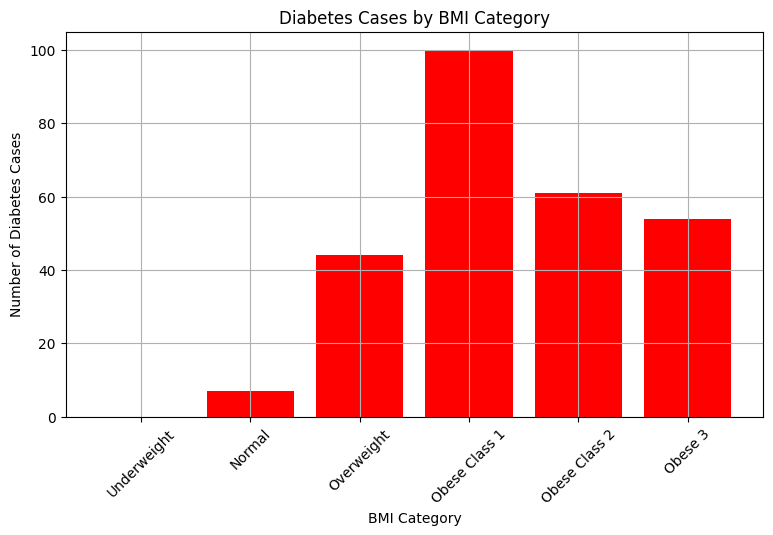

In [9]:
bmi_bins = [1,18.5,25,30,35,40,100]
bmi_labels = ["Underweight","Normal","Overweight","Obese Class 1","Obese Class 2" , "Obese 3"]
data['BMI_Category'] = pd.cut(data['BMI'], bins=bmi_bins, labels=bmi_labels)
bmi_diabetes_cases = {}
bmi_total_cases = {}

for label in bmi_labels:
  subset_df = data[data['BMI_Category'] == label]
  bmi_diabetes_cases[label] = len(data[(data['BMI_Category'] == label) & (data['Outcome'] == 1)])
  bmi_total_cases[label] = len(subset_df)

for label in bmi_labels:
  print("{}:{} diabetes cases out of {} total recorded data".format(label,bmi_diabetes_cases[label],bmi_total_cases[label]))
plt.figure(figsize=(9,5))
plt.bar(bmi_diabetes_cases.keys(),bmi_diabetes_cases.values(),color='red')
plt.title("Diabetes Cases by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Number of Diabetes Cases")
plt.xticks(rotation=45)
plt.grid(True)
plt.show